In [6]:
import numpy as np
#import sympy as sp
#import matplotlib.pyplot as plt

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

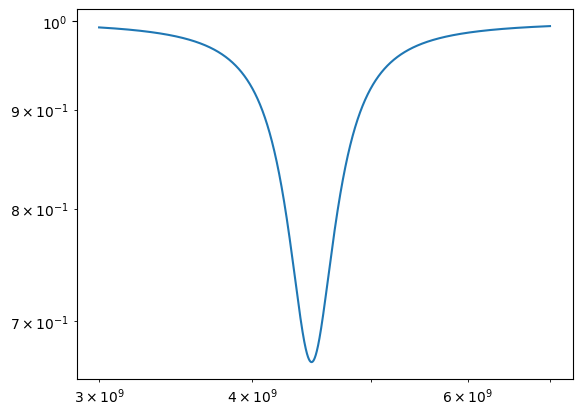

In [8]:
#Series resonator

R = 10 #Ohm
L = 1e-7 #Henry
C = 5e-13 #Farad
omega = np.linspace(3e9, 7e9, 10001)
omega_0 = 1/np.sqrt(L*C)

Z_0 = 50 #Ohm

Z_in = R + 1j*omega*L - 1j/(omega*C)

S_11 = (Z_in - Z_0)/(Z_in + Z_0)

plt.loglog(omega, np.abs(S_11))

plt.show()

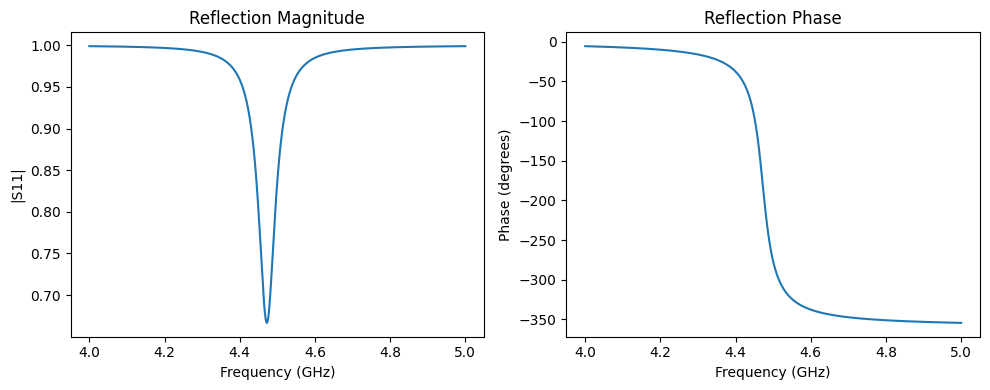

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#Series resonator

R = 10 # Ohm
L = 1e-6 # Henry
C = 5e-14 # Farad
omega = np.linspace(4e9, 5e9, 10001)
Z_0 = 50 # Ohm

Z_in = R + 1j * omega * L - 1j / (omega * C)
S_11 = (Z_in - Z_0) / (Z_in + Z_0)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(omega / 1e9, np.abs(S_11))
plt.xlabel('Frequency (GHz)')
plt.ylabel('|S11|')
plt.title('Reflection Magnitude')

plt.subplot(1, 2, 2)
plt.plot(omega / 1e9, np.unwrap(np.angle(S_11)) * 180 / np.pi)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Phase (degrees)')
plt.title('Reflection Phase')

plt.tight_layout()
plt.show()

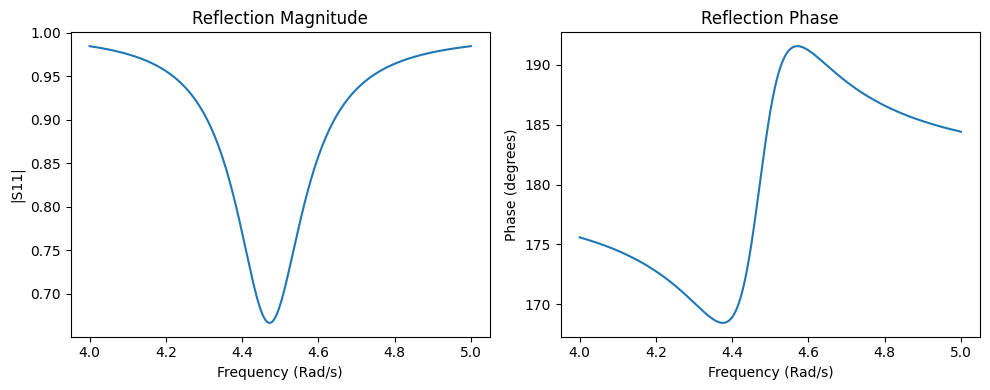

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#Parallell resonator

R = 10 # Ohm
L = 1e-10 # Henry
C = 5e-10 # Farad
omega = np.linspace(4e9, 5e9, 10001)
Z_0 = 50 # Ohm

Z_in = 1/ (1/R + 1 / (1j * omega * L) + 1j * omega * C)
S_11 = (Z_in - Z_0) / (Z_in + Z_0)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(omega / 1e9, np.abs(S_11))
plt.xlabel('Frequency (Rad/s)')
plt.ylabel('|S11|')
plt.title('Reflection Magnitude')

plt.subplot(1, 2, 2)
plt.plot(omega / 1e9, np.unwrap(np.angle(S_11)) * 180 / np.pi)
plt.xlabel('Frequency (Rad/s)')
plt.ylabel('Phase (degrees)')
plt.title('Reflection Phase')

plt.tight_layout()
plt.show()

In [18]:
L = 1.2e-7
C = 1.0e-14
C_in = 0.1e-12
f = 1/(2 * np.pi * np.sqrt(L * C))
Q_0 = 2* np.pi * R / (f * L)
w = 2*np.pi*f
print(w*C_in)
print(1/50)

0.002886751345948129
0.02


In [54]:
4.1e9/0.5e6

8200.0

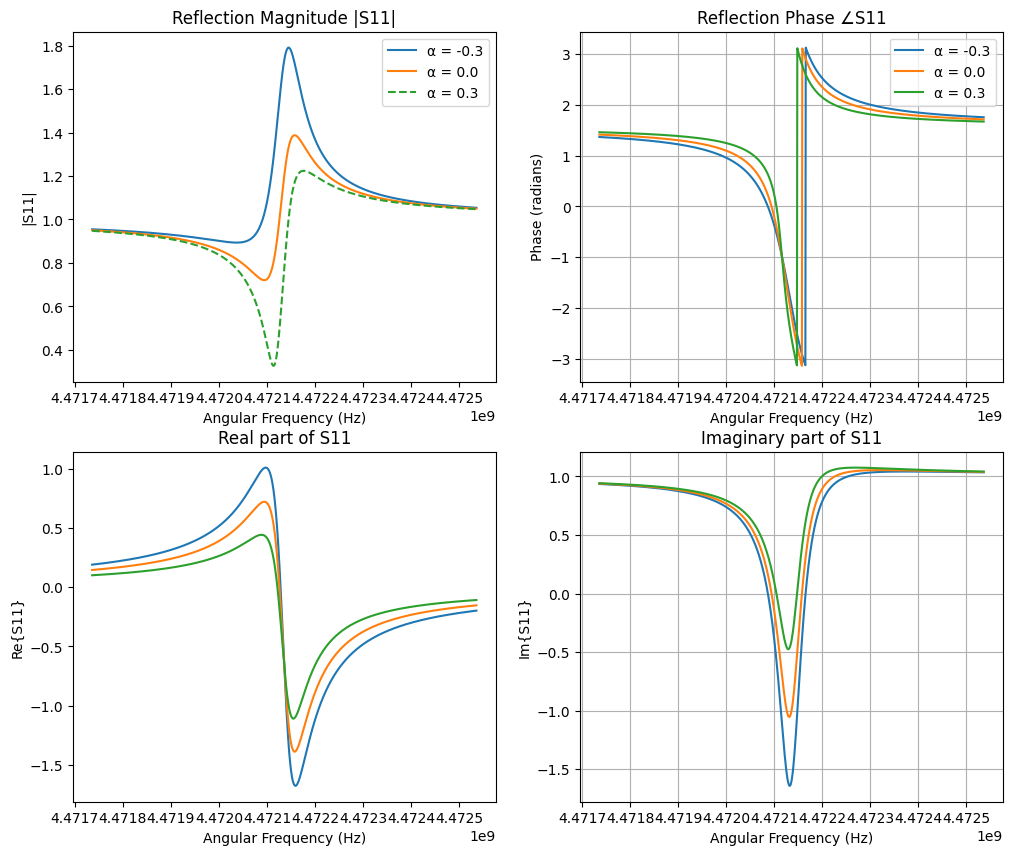

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Series resonator parameters
R = 10               # Ohm (internal resistance)
L = 1e-3             # Henry
C = 5e-17            # Farad
Z_0 = 50             # Ohm (external port impedance)

omega0 = 1 / np.sqrt(L * C)
Q = omega0 * L / R
omega = np.linspace(omega0 - 40 * omega0 / Q, omega0 + 40 * omega0 / Q, 1001)
delta = omega - omega0

k = R / L + Z_0 / L

alpha = np.linspace(-0.3, 0.3, 3)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

q = 2e4
# q = 0
A = 0.5
A = 0
B = 5e-10
B = 0
phi = np.pi/2
# phi = 0

for i, a in enumerate(alpha):
    k0 = a * k        
    ke = (1 - a) * k

    S_11 = (A + omega*B) + ((k0 - ke)/2 + 1j * delta + 1j*q) / ((k0 + ke)/2 + 1j * delta)*np.exp(1j*phi)

    label = f"α = {a:.1f}"
    linestyle = '--' if i >= len(alpha) // 2 + 1 else '-'

    ax[0,0].plot(omega, np.abs(S_11), linestyle=linestyle, label=label)
    ax[0,1].plot(omega, np.angle(S_11), label=label)

    ax[1,0].plot(omega, np.real(S_11), label=label)
    ax[1,1].plot(omega, np.imag(S_11), label=label)

ax[0,0].set_title("Reflection Magnitude |S11|")
ax[0,0].set_xlabel("Angular Frequency (Hz)")
ax[0,0].set_ylabel("|S11|")

ax[0,1].set_title("Reflection Phase ∠S11")
ax[0,1].set_xlabel("Angular Frequency (Hz)")
ax[0,1].set_ylabel("Phase (radians)")
ax[0,1].grid(True, which='both')

ax[0,0].legend()
ax[0,1].legend()

ax[1,0].set_title("Real part of S11")
ax[1,0].set_xlabel("Angular Frequency (Hz)")
ax[1,0].set_ylabel("Re{S11}")

ax[1,1].set_title("Imaginary part of S11")
ax[1,1].set_xlabel("Angular Frequency (Hz)")
ax[1,1].set_ylabel("Im{S11}")
ax[1,1].grid(True, which='both')

NameError: name 'n_c' is not defined

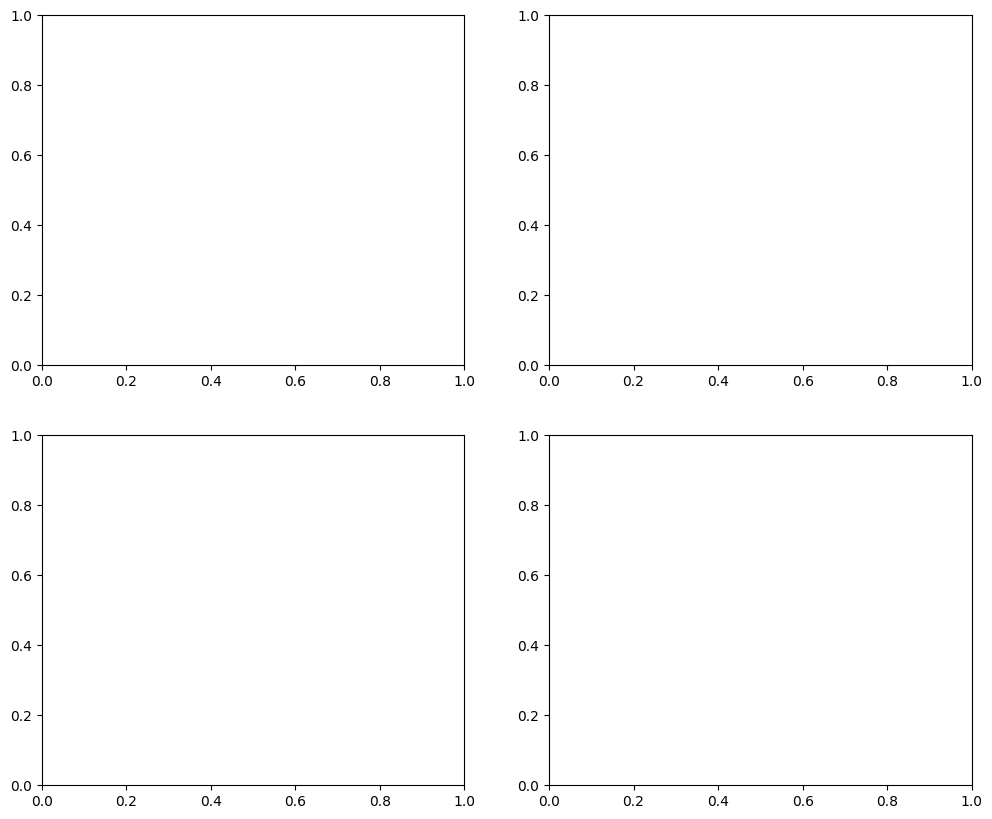

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Series resonator parameters
R = 10               # Ohm (internal resistance)
L = 1e-3             # Henry
C = 5e-17            # Farad
Z_0 = 50             # Ohm (external port impedance)

omega0 = 1 / np.sqrt(L * C)
Q = omega0 * L / R
omega = np.linspace(omega0 - 40 * omega0 / Q, omega0 + 40 * omega0 / Q, 101)
delta = omega - omega0

k = R / L + Z_0 / L

alpha = np.linspace(0.1, 0.9, 9)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

q = -2e7
q = 0
A = 0.5
A = 0
B = 5e-10
B = 0
phi = 3*np.pi/2
Kappa = 1.5
p_in = 0.5e-9
# phi = 0

def intracavity_photon_number(omega, Kappa):
    n_in = p_in / (h * omega)
    delta = omega - omega0

    #a*n_c**3 + b*n_c**2 + c*n_c + d
    a = Kappa**2
    b = - 2 * Kappa * delta
    c = (delta**2 + (k0 + ke)**2 / 4)
    d = - ke * n_in
    roots = np.roots([a, b, c, d])

    root_list = []
    for root in roots:
        if np.imag(root) == 0.0:
            root_list.append(root)
        else:
            root_list.append(-np.inf)
    n_c = max(root_list)
    if n_c == -np.inf:
        raise ValueError("no real roots")
    else:
        return np.real(n_c)


for i, a in enumerate(alpha):

    k0 = a * k        
    ke = (1 - a) * k

    S_11 = ((A + omega*B) + ((k0 - ke)/2 + 1j * (delta - Kappa * n_c) + 1j*q) / ((k0 + ke)/2 + 1j * (delta - Kappa * n_c)))*np.exp(1j*phi)

    label = f"α = {a:.1f}"
    linestyle = '--' if i >= len(alpha) // 2 + 1 else '-'

    ax[0,0].plot(omega, np.abs(S_11), linestyle=linestyle, label=label)
    ax[0,1].plot(omega, np.angle(S_11), label=label)

    ax[1,0].plot(omega, np.real(S_11), label=label)
    ax[1,1].plot(omega, np.imag(S_11), label=label)

ax[0,0].set_title("Reflection Magnitude |S11|")
ax[0,0].set_xlabel("Angular Frequency (Hz)")
ax[0,0].set_ylabel("|S11|")

ax[0,1].set_title("Reflection Phase ∠S11")
ax[0,1].set_xlabel("Angular Frequency (Hz)")
ax[0,1].set_ylabel("Phase (radians)")
ax[0,1].grid(True, which='both')

ax[0,0].legend()
ax[0,1].legend()

ax[1,0].set_title("Real part of S11")
ax[1,0].set_xlabel("Angular Frequency (Hz)")
ax[1,0].set_ylabel("Re{S11}")

ax[1,1].set_title("Imaginary part of S11")
ax[1,1].set_xlabel("Angular Frequency (Hz)")
ax[1,1].set_ylabel("Im{S11}")
ax[1,1].grid(True, which='both')